<a href="https://colab.research.google.com/github/Archi1809/Fraud_Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
creditcard_data = pd.read_csv("creditcard.csv")

# Display the dimensions of the dataset
print(creditcard_data.shape)

# Display the first 6 rows of the dataset
print(creditcard_data.head(6))


(7973, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739

In [3]:
# Display the last 6 rows of the dataset
print(creditcard_data.tail(6))

# Display the frequency table for the 'Class' variable
class_table = creditcard_data['Class'].value_counts()
print(class_table)

# Display the summary statistics for the 'Amount' variable
amount_summary = creditcard_data['Amount'].describe()
print(amount_summary)

# Display the column names of the dataset
column_names = creditcard_data.columns
print(column_names)

# Calculate the variance and standard deviation of the 'Amount' variable
amount_variance = creditcard_data['Amount'].var()
amount_std_dev = creditcard_data['Amount'].std()
print("Variance:", amount_variance)
print("Standard Deviation:", amount_std_dev)


       Time        V1        V2        V3        V4        V5        V6  \
7967  10980 -0.046786  0.030050  2.037794 -0.670130 -0.727283 -0.588537   
7968  10980  1.284388 -0.013181  0.646174  0.198985 -0.568675 -0.526121   
7969  10981  1.190428 -0.122329  0.954945  0.267101 -0.971026 -0.652279   
7970  10981 -0.725175  0.298202  1.824761 -2.587170  0.283605 -0.016617   
7971  10981  1.226153 -0.129645  0.735197  0.142752 -0.703245 -0.349641   
7972  10981  1.145381 -0.059349  0.968088  0.267891 -0.822582 -0.597727   

            V7        V8        V9  ...       V21       V22       V23  \
7967 -0.067966 -0.370767  0.228931  ...  0.264364  1.078896 -0.097768   
7968 -0.448235 -0.167709  1.773223  ... -0.101868 -0.030298 -0.081412   
7969 -0.612992 -0.003909  1.633117  ... -0.015001  0.127027  0.012079   
7970  0.153659  0.045084 -0.197611  ... -0.017097 -0.070535 -0.442861   
7971 -0.612641  0.020507  1.648986  ... -0.047936  0.040196 -0.057391   
7972 -0.450197 -0.119747  1.338188  

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

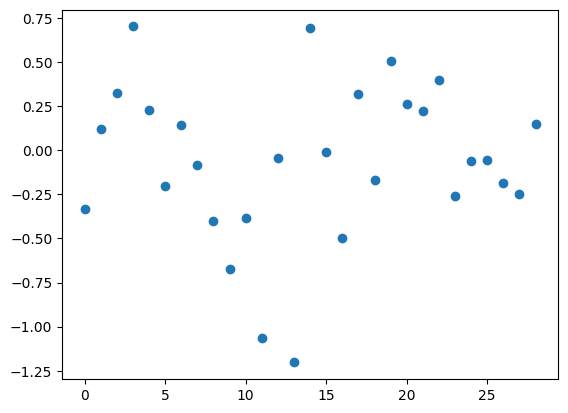

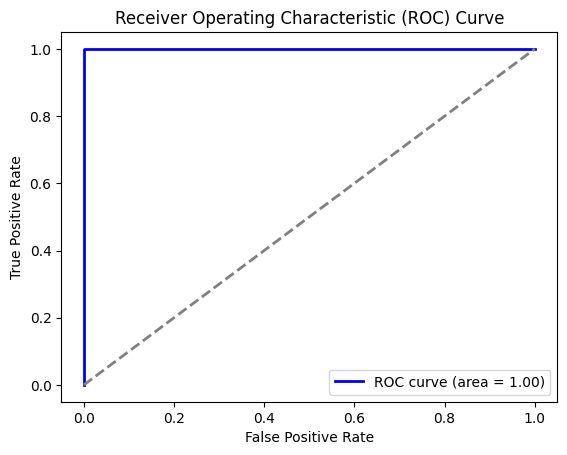

|--- V12 <= -4.59
|   |--- V14 <= -0.27
|   |   |--- class: 1.0
|   |--- V14 >  -0.27
|   |   |--- class: 0.0
|--- V12 >  -4.59
|   |--- V17 <= -2.72
|   |   |--- V20 <= 0.15
|   |   |   |--- class: 1.0
|   |   |--- V20 >  0.15
|   |   |   |--- class: 0.0
|   |--- V17 >  -2.72
|   |   |--- V15 <= 2.00
|   |   |   |--- class: 0.0
|   |   |--- V15 >  2.00
|   |   |   |--- V23 <= 1.33
|   |   |   |   |--- class: 0.0
|   |   |   |--- V23 >  1.33
|   |   |   |   |--- class: 1.0



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Display the first 6 rows of the dataset
print(creditcard_data.head())

# Standardize the 'Amount' variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditcard_data['Amount'] = scaler.fit_transform(creditcard_data[['Amount']])

# Create a new DataFrame without the first column
new_data = creditcard_data.iloc[:, 1:]

# Display the first 6 rows of the new DataFrame
print(new_data.head())

# Split the data into training and testing sets
X = new_data.drop('Class', axis=1)
y = new_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Display the dimensions of the training and testing sets
print(X_train.shape)
print(X_test.shape)

# Check for missing values in the training set
print(X_train.isnull().sum())

# If there are missing values, you may choose to impute or drop them
# For example, you can drop rows with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Adjust y_train accordingly

# Alternatively, you can impute missing values using methods like mean, median, or others
# Example: X_train.fillna(X_train.mean(), inplace=True)


# Train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Display the summary of the logistic regression model
print(logistic_model.coef_)
print(logistic_model.intercept_)

# Plot the logistic regression model
plt.plot(logistic_model.coef_.flatten(), marker='o', linestyle='')

# Use the trained logistic regression model to predict on the test set
lr_predict = logistic_model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Train a decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Display the decision tree rules
tree_rules = export_text(decision_tree_model, feature_names=list(X.columns))
print(tree_rules)
